## Introduction
In workspaces like this one, you will be able to practice visualization techniques you've seen in the course materials. In this particular Jupyter Notebook, you'll practice creating single-variable plots for categorical data.

The cells where you are expected to contribute, are highlighted with **TO DO** markdown. 

In [25]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## About the Dataset
In this workspace, you'll be working with the dataset comprised of attributes of creatures in the video game series Pokémon. The data was assembled from the database of information found in this [GitHub repository](https://github.com/veekun/pokedex/tree/master/pokedex/data/csv).

In [26]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


### **TO DO Task 1** 
1. Explore the `pokemon` dataframe, and try to understand the significance of each of its column.
2. There have been quite a few Pokémon introduced over the series' history. Display the count of Pokémon introduced in each generation? Create a _bar chart_ of these frequencies using the 'generation_id' column.

In [27]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               807 non-null    int64  
 1   species          807 non-null    object 
 2   generation_id    807 non-null    int64  
 3   height           807 non-null    float64
 4   weight           807 non-null    float64
 5   base_experience  807 non-null    int64  
 6   type_1           807 non-null    object 
 7   type_2           405 non-null    object 
 8   hp               807 non-null    int64  
 9   attack           807 non-null    int64  
 10  defense          807 non-null    int64  
 11  speed            807 non-null    int64  
 12  special-attack   807 non-null    int64  
 13  special-defense  807 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 88.4+ KB


In [28]:
pokemon.describe()

,id,generation_id,height,weight,base_experience,hp,attack,defense,speed,special-attack,special-defense
count,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000
mean,404.000000,3.714994,1.162454,61.771128,144.848823,68.748451,76.086741,71.726146,65.830235,69.486989,70.013631
std,233.105126,1.944148,1.081030,111.519355,74.953116,26.032808,29.544598,29.730228,27.736838,29.439715,27.292344
min,1.000000,1.000000,0.100000,0.100000,36.000000,1.000000,5.000000,5.000000,5.000000,10.000000,20.000000
25%,202.500000,2.000000,0.600000,9.000000,66.000000,50.000000,55.000000,50.000000,45.000000,45.000000,50.000000
50%,404.000000,4.000000,1.000000,27.000000,151.000000,65.000000,75.000000,67.000000,65.000000,65.000000,65.000000
75%,605.500000,5.000000,1.500000,63.000000,179.500000,80.000000,95.000000,89.000000,85.000000,90.000000,85.000000
max,807.000000,7.000000,14.500000,999.900000,608.000000,255.000000,181.000000,230.000000,160.000000,173.000000,230.000000


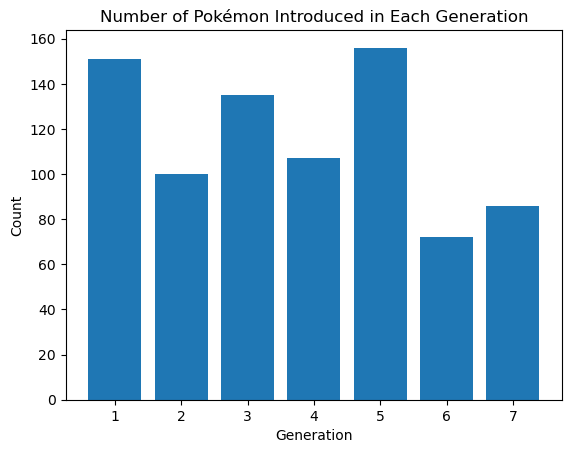

In [29]:
generation_counts = pokemon['generation_id'].value_counts().sort_index()
plt.bar(generation_counts.index, generation_counts.values)
plt.xlabel('Generation')
plt.ylabel('Count')
plt.title('Number of Pokémon Introduced in Each Generation')
plt.show()


### **TO DO Task 2** 
1. Each Pokémon species has either `type_1`, `type_2` or both `types` that play a part in its offensive and defensive capabilities. The code below creates a new dataframe `pkmn_types` that club the rows of both `type_1` and `type_2`, so that the resulting dataframe has **new** column, `type_level`. 

**Display, how frequent is each type?**



The function below will do the following in the pokemon dataframe *out of place*:
1. Select the 'id', and 'species' columns from pokemon. 
2. Remove the 'type_1', 'type_2' columns from pokemon
3. Add a new column 'type_level' that can have a value either 'type_1' or 'type_2'
4. Add another column 'type' that will contain the actual value contained in the 'type_1', 'type_2' columns. For example, the first row in the pokemon dataframe having `id=1`	and `species=bulbasaur` will now occur twice in the resulting dataframe after the `melt()` operation. The first occurrence will have `type=grass`, whereas, the second occurrence will have `type=poison`.

In [30]:
pkmn_types = pokemon.melt(id_vars = ['id','species'], 
                          value_vars = ['type_1', 'type_2'], 
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types.head()

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire


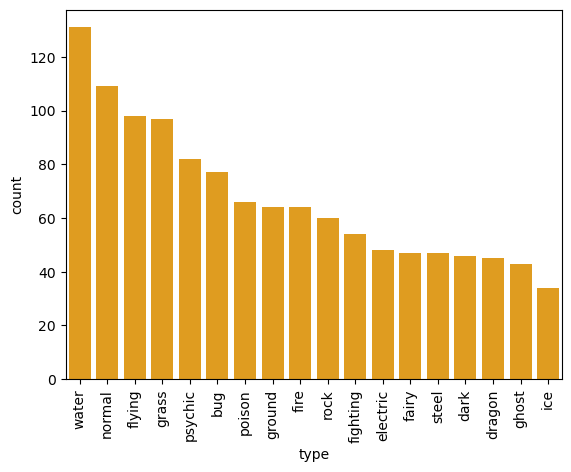

In [31]:
order =pkmn_types.type.value_counts().index
sb.countplot(data=pkmn_types, x='type',order=order,color='orange');
plt.xticks(rotation=90);

2. Your task is to use this dataframe to create a _relative frequency_ plot of the proportion of Pokémon with each type, _sorted_ from most frequent to least. **Hint**: The sum across bars should be greater than 100%, since many Pokémon have two types. Keep this in mind when considering a denominator to compute relative frequencies.

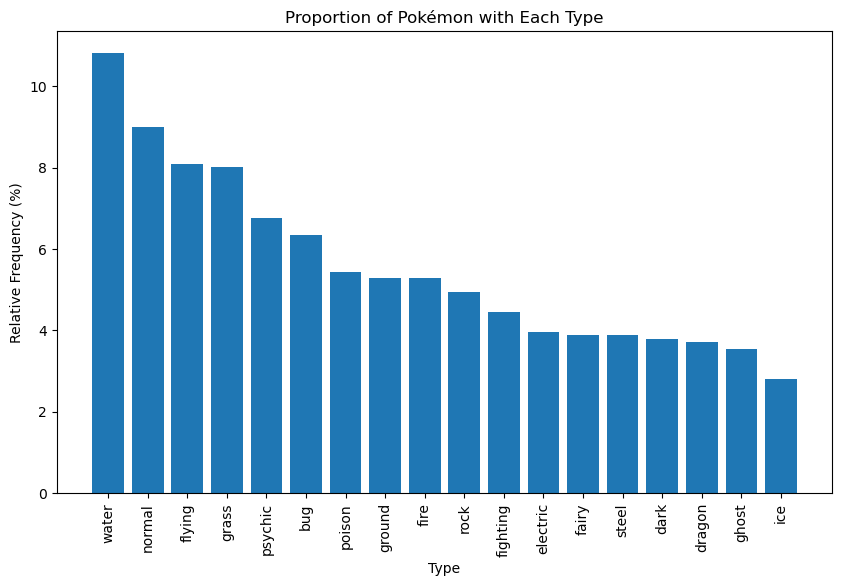

In [35]:
type_proportions = pkmn_types['type'].value_counts(normalize=True) * 100
type_proportions_sorted = type_proportions.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(type_proportions_sorted.index, type_proportions_sorted.values)
plt.xlabel('Type')
plt.ylabel('Relative Frequency (%)')
plt.title('Proportion of Pokémon with Each Type')
plt.xticks(rotation=90)
plt.show()
